In [0]:
import torch
import cv2
import torchvision
from torchvision.models.detection import maskrcnn_resnet50_fpn
from PIL import Image
import PIL
import urllib

In [0]:
image_url = 'https://ohme.pl/portal/wp-content/uploads/2017/07/29243755575_74c98db5a7_k-760x428.jpg'
image_response = urllib.request.urlopen(image_url)

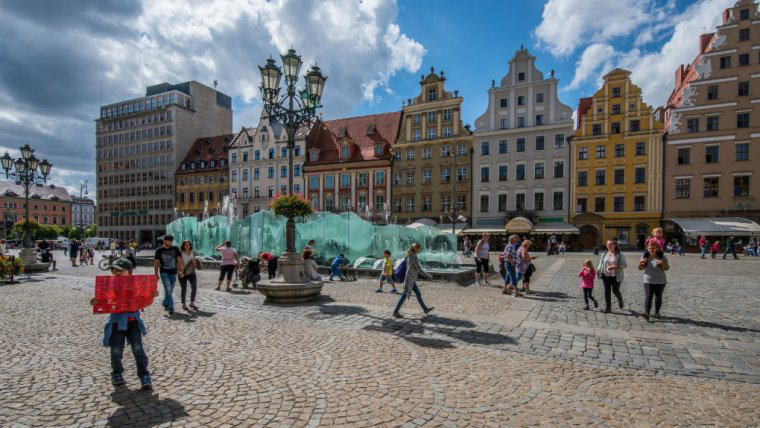

In [6]:
img = Image.open(image_response) 
img

In [0]:
model = maskrcnn_resnet50_fpn(pretrained=True)  

In [10]:
from torchvision.transforms import ToTensor
input_tensor = ToTensor()(img) 
input_tensor.shape

torch.Size([3, 428, 760])

In [0]:
input_tensor = input_tensor.unsqueeze(0)

In [12]:
input_tensor.shape

torch.Size([1, 3, 428, 760])

In [13]:
model.eval()

MaskRCNN(
  (transform): GeneralizedRCNNTransform()
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(original_name=FrozenBatchNorm2d)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(original_name=FrozenBatchNorm2d)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(original_name=FrozenBatchNorm2d)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(original_name=FrozenBatchNorm2d)
          (relu): ReLU(inplace=True)
          (downsample): Sequential(
         

In [0]:
outputs = model(input_tensor)

In [15]:
len(outputs)

1

In [16]:
output = outputs[0]
output.keys() 

dict_keys(['boxes', 'labels', 'scores', 'masks'])

In [0]:
boxes = output['boxes']
labels = output['labels']
scores = output['scores']
masks = output['masks']

In [13]:
labels #categories found in my imag

tensor([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1, 64,  2,  3,  1,  9,  1,  3, 27,  1, 41,  2,  1,  1,  1, 42,
        28,  1,  1, 27, 64,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1, 41, 15,
         1, 28,  1, 64,  1,  1, 64,  1,  1, 31,  1,  1,  1,  1,  1, 31, 64,  1,
        64,  3,  4, 31,  3,  1,  1,  1, 41,  1, 28,  3, 31,  1, 27,  2,  3])

#Explainted categories: https://github.com/nightrome/cocostuff/blob/master/labels.md

In [14]:
scores

tensor([0.9983, 0.9964, 0.9947, 0.9944, 0.9940, 0.9920, 0.9918, 0.9902, 0.9901,
        0.9889, 0.9793, 0.9752, 0.9726, 0.9590, 0.9576, 0.8668, 0.8266, 0.7792,
        0.7750, 0.7748, 0.7088, 0.7045, 0.6877, 0.6838, 0.6826, 0.6621, 0.6441,
        0.6151, 0.6097, 0.6036, 0.5448, 0.5356, 0.5137, 0.5032, 0.5021, 0.4784,
        0.4568, 0.4497, 0.4304, 0.4207, 0.4136, 0.3547, 0.3378, 0.3333, 0.3080,
        0.2887, 0.2781, 0.2752, 0.2702, 0.2684, 0.2646, 0.2581, 0.2336, 0.2254,
        0.2235, 0.2129, 0.1980, 0.1966, 0.1916, 0.1899, 0.1883, 0.1748, 0.1716,
        0.1706, 0.1501, 0.1461, 0.1424, 0.1374, 0.1236, 0.1199, 0.1162, 0.1136,
        0.1069, 0.1061, 0.0950, 0.0906, 0.0901, 0.0885, 0.0847, 0.0832, 0.0825,
        0.0775, 0.0762, 0.0703, 0.0652, 0.0646, 0.0570, 0.0534, 0.0520],
       grad_fn=<IndexBackward>)

In [0]:
choosen_class = 1
score_threshold = 0.5
pixels = []

for i in range(len(scores)):
  if scores[i] >= score_threshold and labels[i]==choosen_class :
    pixels.append(masks[i])

In [17]:
len(pixels)

27

In [38]:
from torchvision.transforms import ToPILImage
import numpy as np

img.size

(760, 428)

In [0]:
global_mask = np.zeros((img.size[1], img.size[0], 3), dtype='uint8') 
# Image.fromarray(global_mask)

In [0]:
threshold = 0.5

for mask in pixels:
  m = np.array(ToPILImage()(mask))
  m = np.expand_dims(m, axis=2) 
  global_mask = global_mask + ((m)>threshold).astype('uint8')

global_mask = (global_mask>0).astype('uint8')*255
# global_mask = global_mask.astype('uint8')

In [21]:
global_mask.shape

(428, 760, 3)

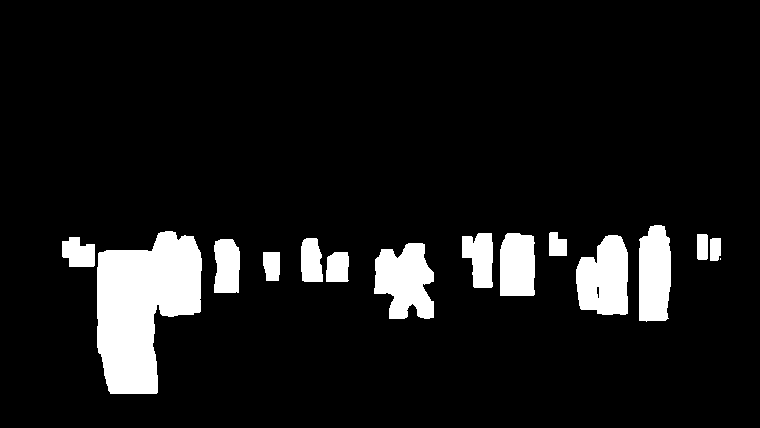

In [41]:
Image.fromarray(global_mask)

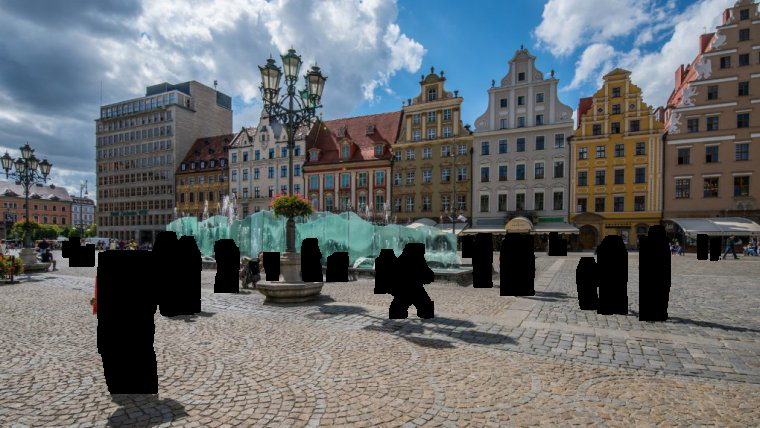

In [23]:
final_image = (np.array(img) * (global_mask==0)).astype('uint8')
Image.fromarray(final_image)

In [25]:
global_mask.shape

(428, 760, 3)

In [42]:
violet_mask = np.full((img.size[1], img.size[0], 3), fill_value=(1), dtype='uint8')

#1 way:
Image.fromarray(violet_mask)
violet = np.array([ 128,0, 128] )
violet = np.tile(violet, [global_mask.shape[0],global_mask.shape[1],1]).astype('uint8')

violet.shape

(428, 760, 3)

In [0]:
Image.fromarray(violet)

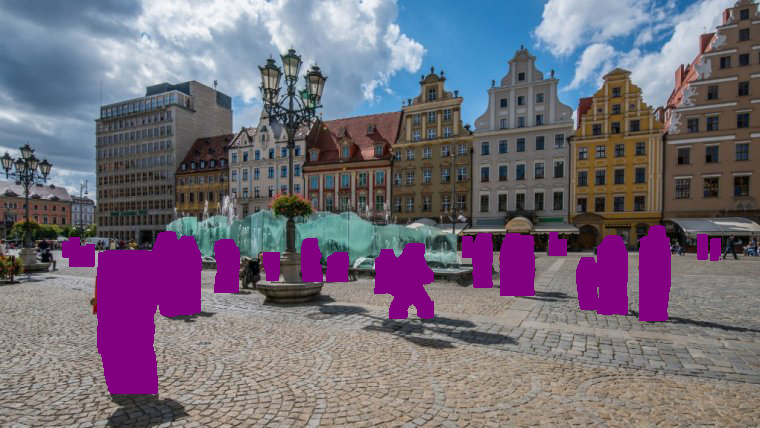

In [43]:
img_orig = np.array(img)
img_mask = np.array(global_mask)

img_final = (img_mask == 255) * violet + (img_mask!=255) * img_orig
img_final = Image.fromarray(img_final)
img_final

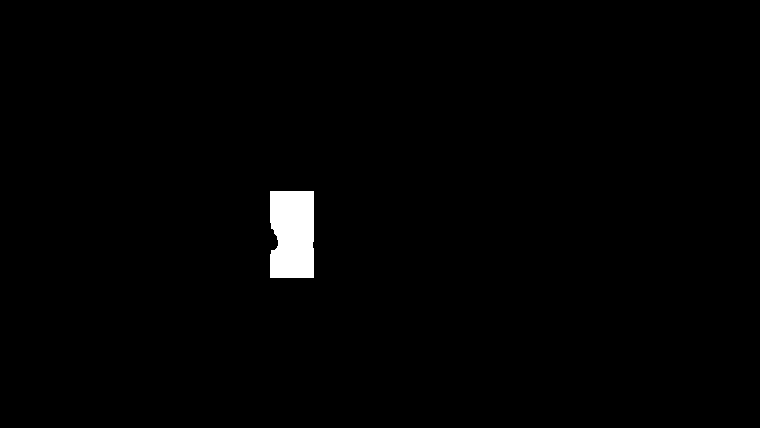

In [45]:
choosen_class = 64
score_threshold = 0.5
pixels = []

for i in range(len(scores)):
  if scores[i] >= score_threshold and labels[i]==choosen_class :
    pixels.append(masks[i])

threshold = 0.5

global_mask2 = np.zeros((img.size[1], img.size[0], 3), dtype='uint8') 

for mask in pixels:
  m = np.array(ToPILImage()(mask))
  m = np.expand_dims(m, axis=2) 
  global_mask2 = global_mask2 + ((m)>threshold).astype('uint8')

global_mask2 = (global_mask2>0).astype('uint8')*255
Image.fromarray(global_mask2)

In [0]:
green_mask = np.full((img.size[1], img.size[0], 3), fill_value=(1), dtype='uint8')

#1 way:
Image.fromarray(green_mask)
green = np.array([50,205, 50] )
green = np.tile(green, [global_mask.shape[0],global_mask.shape[1],1]).astype('uint8')

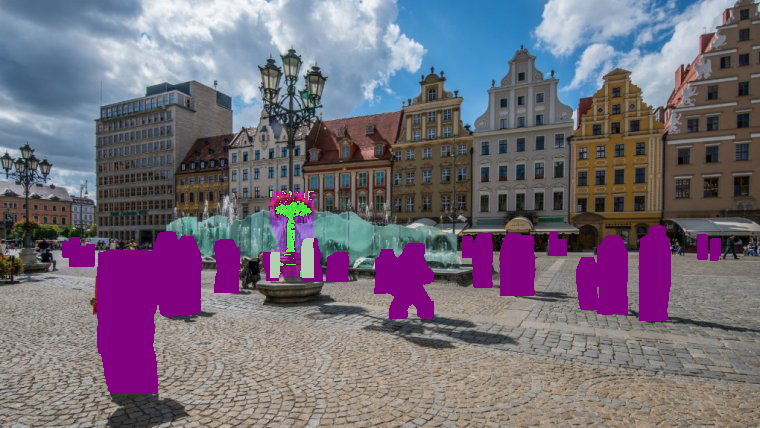

In [47]:
img_orig = np.array(img)
img_mask = np.array(global_mask)
img_mask2 = np.array(global_mask2)

img_final = (img_mask == 255) * violet + (img_mask2 == 255) * green + (img_mask!=255) * img_orig
img_final = Image.fromarray(img_final)
img_final